<a href="https://colab.research.google.com/github/Rahul711sharma/News-Topic-Modeling-NLP/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

##**Libraries**

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import glob
import plotly.express as px

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Data**




In [55]:
path ="/content/drive/MyDrive/Almabetter/bbc/"

In [56]:
#Importing text file paths
business = glob.glob(path+'/business/*')
entertainment = glob.glob(path+'/entertainment/*')
politics = glob.glob(path+'/politics/*')
sports = glob.glob(path+'/sport/*')
tech = glob.glob(path+'/tech/*')

In [57]:
business[0:5]

['/content/drive/MyDrive/Almabetter/bbc//business/349.txt',
 '/content/drive/MyDrive/Almabetter/bbc//business/321.txt',
 '/content/drive/MyDrive/Almabetter/bbc//business/311.txt',
 '/content/drive/MyDrive/Almabetter/bbc//business/301.txt',
 '/content/drive/MyDrive/Almabetter/bbc//business/341.txt']

In [58]:
len(business)

197

In [59]:
def make_list(data):
    list = []
    for x in range(len(data)):
      file = open(data[x],'r')
      list.append(file.read())
    return(list)

In [60]:
business_texts= make_list(business)
entertainment_text = make_list(entertainment)
politics_texts= make_list(politics)
sport_texts= make_list(sports)
tech_text = make_list(tech)

In [61]:
#Number of documents in every topics
print(len(business_texts),len(entertainment_text),len(politics_texts),len(sport_texts),len(tech_text))

197 196 50 74 110


##**Functions For Text Cleaning and Analysis**

In [62]:
#Data Cleaning 
# We did not clear punctuations because they will help in sentence analysis
def text_processing(data):
  data = data.map(lambda x: x.replace('\n',' '))
  data = data.map(lambda x: x.lower())
  # data = data.map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  data = data.map(lambda x: ' '.join([i for i in x.split(' ') if i not in stopwords.words('english')]))
  return data

In [63]:
def number_of_sentences(data):

  data['Number of sentences'] = [len(i) for i in data['Texts'].apply(nltk.sent_tokenize)]
  return data.head()

In [64]:
#remove punctuation
def remove_punctuation(data):
  data['Texts'] = data['Texts'].map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  return data.head(2)

In [65]:
# number of words in a document 

def number_of_words(data):
  words_count = [len(i.split()) for i in data['Texts']]
  data['Number of words'] = words_count
  return data.head()

In [66]:
# Number of Complex words in document
# Complex words are defined by the length of a word greater than 4

def count_complex_words(data):
  count_complex_words = []
  for i in data['Texts']:
    count = 0
    for j in range(len(i.split())):
      if len(i.split()[j])>4:
        count+=1
      if j == len(i.split())-1:
        count_complex_words.append(count)
  data['Number of Complex words'] = count_complex_words
  return data.head()

In [67]:
# Average length of sentences
def average_len_sentence(data):

  data['Average Length of sentence'] = np.int64(data['Number of words']/data['Number of sentences'])
  return (data.head())

In [68]:
#lemmetization of words in document
def lemmatize(data):
  lemmatizer = WordNetLemmatizer()
  data['Texts'] = data['Texts'].map(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))
  return data['Texts'][0]

In [69]:
def words_count(data):
  count = []
  word = [] 
  all_words = ' '.join(data['Texts']).split()
  for i in set(all_words):
    word.append(i)
    count.append(all_words.count(i))
  word_count_df = pd.DataFrame({'Words': word,'Count':count},columns=['Words','Count']).sort_values(by='Count', ascending=False)
  return word_count_df

## **Analysis Of Business Articles**

In [70]:
business = pd.DataFrame({'Texts': business_texts})
business.head()

,Texts
0,S Korean lender faces liquidation\n\nCreditors...
1,"Diageo to buy US wine firm\n\nDiageo, the worl..."
2,Stormy year for property insurers\n\nA string ...
3,Libya takes $1bn in unfrozen funds\n\nLibya ha...
4,Jarvis sells Tube stake to Spain\n\nShares in ...


In [71]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
business['Texts']= text_processing(business['Texts'])

In [73]:
number_of_sentences(business)

,Texts,Number of sentences
0,korean lender faces liquidation creditors sou...,17
1,"diageo buy us wine firm diageo, world's bigge...",7
2,"stormy year property insurers string storms, ...",9
3,libya takes $1bn unfrozen funds libya withdra...,8
4,jarvis sells tube stake spain shares engineer...,9


In [74]:
business['Number of sentences'].nlargest(15)

37     42
59     40
48     34
23     31
143    31
177    31
49     29
118    29
139    28
16     27
134    27
186    26
171    25
58     24
124    24
Name: Number of sentences, dtype: int64

In [75]:
remove_punctuation(business)

,Texts,Number of sentences
0,korean lender faces liquidation creditors sou...,17
1,diageo buy us wine firm diageo worlds biggest...,7


In [76]:
number_of_words(business)

,Texts,Number of sentences,Number of words
0,korean lender faces liquidation creditors sou...,17,227
1,diageo buy us wine firm diageo worlds biggest...,7,102
2,stormy year property insurers string storms t...,9,131
3,libya takes 1bn unfrozen funds libya withdraw...,8,110
4,jarvis sells tube stake spain shares engineer...,9,143


In [77]:
count_complex_words(business)

,Texts,Number of sentences,Number of words,Number of Complex words
0,korean lender faces liquidation creditors sou...,17,227,156
1,diageo buy us wine firm diageo worlds biggest...,7,102,73
2,stormy year property insurers string storms t...,9,131,101
3,libya takes 1bn unfrozen funds libya withdraw...,8,110,78
4,jarvis sells tube stake spain shares engineer...,9,143,106


In [78]:
average_len_sentence(business)

,Texts,Number of sentences,Number of words,Number of Complex words,Average Length of sentence
0,korean lender faces liquidation creditors sou...,17,227,156,13
1,diageo buy us wine firm diageo worlds biggest...,7,102,73,14
2,stormy year property insurers string storms t...,9,131,101,14
3,libya takes 1bn unfrozen funds libya withdraw...,8,110,78,13
4,jarvis sells tube stake spain shares engineer...,9,143,106,15


In [79]:
lemmatize(business)

'korean lender face liquidation creditor south korea top credit card firm said put company liquidation exparent firm fails back bailout lg card creditor given lg group wednesday sign 11bn rescue package firm avoided bankruptcy thanks 45bn bailout january 2004 gave control creditor lg group said package reflect firm new ownership accept unfair burden least seven million people south korea use lg card plastic purchase lg card creditor threatened parent group lg group penalty fails respond demand creditor would seek strong financial sanction lg group lg card liquidated said yoo jichang governor korean development bank kdb one card firm major creditor lg group said providing help credit card issuer could hurt corporate credibility could spark shareholder lawsuit say want fair reasonable guideline splitting financial burden creditor 993 lg card creditor asked government mediate avoid risk stability financial market kdb said analyst believe compromise likely lg group know impact consumer dem

In [83]:
words_count_business = words_count(business)
words_count_business[1:30]

,Words,Count
5613,u,314
6687,year,310
1105,company,272
922,firm,207
357,mr,203
1853,bank,173
4864,market,171
4078,also,165
1417,sale,161
2590,would,160


In [85]:
px.bar(words_count_business[1:100],'Words','Count')

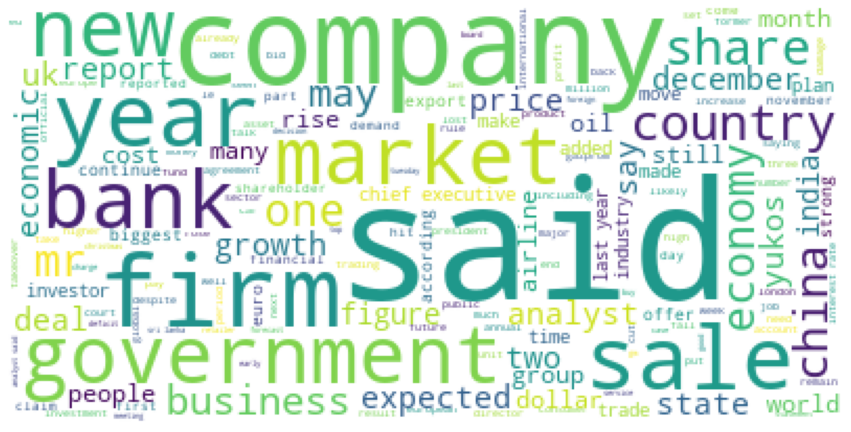

In [81]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(background_color="white").generate(' '.join(list(business['Texts'])))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###**ADVANCED AND SEMANTIC ANALYSIS**

In [ ]:
def semantics_analysis(data):
  

## **Analysis of all Articles**

In [15]:
complete_text = business_texts + entertainment_text + politics_texts + sport_texts + tech_text

In [16]:
len(complete_text)

627

In [ ]:
data = pd.DataFrame({'Texts': complete_text})
data.head()

,Texts
0,S Korean lender faces liquidation\n\nCreditors...
1,"Diageo to buy US wine firm\n\nDiageo, the worl..."
2,Stormy year for property insurers\n\nA string ...
3,Libya takes $1bn in unfrozen funds\n\nLibya ha...
4,Jarvis sells Tube stake to Spain\n\nShares in ...


In [ ]:
data['Texts']= text_processing(data['Texts'])

In [ ]:
data.head()

,Texts
0,korean lender faces liquidation creditors sou...
1,"diageo buy us wine firm diageo, world's bigge..."
2,"stormy year property insurers string storms, ..."
3,libya takes $1bn unfrozen funds libya withdra...
4,jarvis sells tube stake spain shares engineer...


In [ ]:
number_of_sentences(data)

,Texts,Number of sentences
0,korean lender faces liquidation creditors sou...,17
1,"diageo buy us wine firm diageo, world's bigge...",7
2,"stormy year property insurers string storms, ...",9
3,libya takes $1bn unfrozen funds libya withdra...,8
4,jarvis sells tube stake spain shares engineer...,9


In [ ]:
data['Number of sentences'].nlargest(15)

249    229
406    148
547    147
278    137
387    134
578    107
487     79
550     58
354     51
602     51
366     48
521     46
618     46
268     45
520     45
Name: Number of sentences, dtype: int64

In [ ]:
remove_punctuation(data)

,Texts,Number of sentences
0,korean lender faces liquidation creditors sou...,17
1,diageo buy us wine firm diageo worlds biggest...,7


In [ ]:
number_of_words(data)

,Texts,Number of sentences,Number of words
0,korean lender faces liquidation creditors sou...,17,227
1,diageo buy us wine firm diageo worlds biggest...,7,102
2,stormy year property insurers string storms t...,9,131
3,libya takes 1bn unfrozen funds libya withdraw...,8,110
4,jarvis sells tube stake spain shares engineer...,9,143


In [ ]:
count_complex_words(data)

,Texts,Number of sentences,Number of words,Number of Complex words
0,korean lender faces liquidation creditors sou...,17,227,156
1,diageo buy us wine firm diageo worlds biggest...,7,102,73
2,stormy year property insurers string storms t...,9,131,101
3,libya takes 1bn unfrozen funds libya withdraw...,8,110,78
4,jarvis sells tube stake spain shares engineer...,9,143,106


In [ ]:
average_len_sentence(data)

,Texts,Number of sentences,Number of words,Number of Complex words,Average Length of sentence
0,korean lender faces liquidation creditors sou...,17,227,156,13
1,diageo buy us wine firm diageo worlds biggest...,7,102,73,14
2,stormy year property insurers string storms t...,9,131,101,14
3,libya takes 1bn unfrozen funds libya withdraw...,8,110,78,13
4,jarvis sells tube stake spain shares engineer...,9,143,106,15


In [ ]:
lemmatize(data)

'korean lender face liquidation creditor south korea top credit card firm said put company liquidation exparent firm fails back bailout lg card creditor given lg group wednesday sign 11bn rescue package firm avoided bankruptcy thanks 45bn bailout january 2004 gave control creditor lg group said package reflect firm new ownership accept unfair burden least seven million people south korea use lg card plastic purchase lg card creditor threatened parent group lg group penalty fails respond demand creditor would seek strong financial sanction lg group lg card liquidated said yoo jichang governor korean development bank kdb one card firm major creditor lg group said providing help credit card issuer could hurt corporate credibility could spark shareholder lawsuit say want fair reasonable guideline splitting financial burden creditor 993 lg card creditor asked government mediate avoid risk stability financial market kdb said analyst believe compromise likely lg group know impact consumer dem

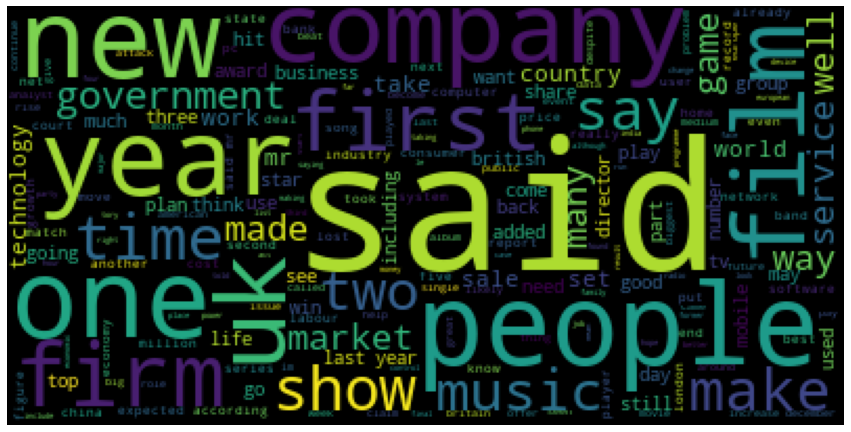

In [ ]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud().generate(' '.join(list(data['Texts'])))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
word_count = words_count(data)

In [ ]:
word_count[0:20]

,Words,Count
11283,said,2080
102,year,918
9298,mr,714
7898,u,712
9154,also,619
208,would,604
16163,people,591
2226,one,585
7336,film,569
13615,new,523


In [ ]:
px.bar(word_count[0:50],x = 'Words',y= 'Count')

(0.0, 1000.0)

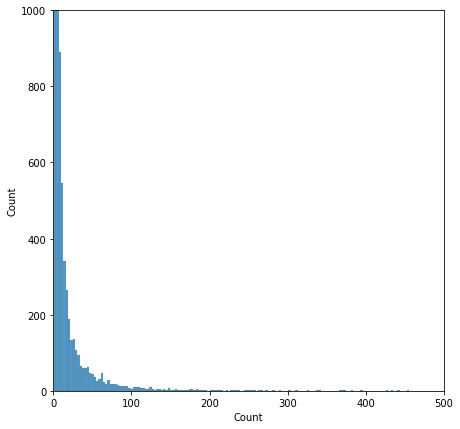

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(word_count['Count'],bins=700)
plt.xlim((0,500))
plt.ylim((0,1000))

(0.0, 10.0)

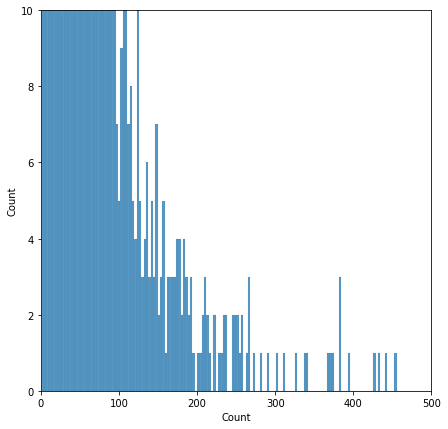

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(word_count['Count'],bins=700)
plt.xlim((0,500))
plt.ylim((0,10))

##**Vectorization**

In [ ]:
vectors = CountVectorizer(max_features=7000)
document_term_matrix = vectors.fit_transform(data['Texts'])

In [ ]:
document_term_matrix.shape

(627, 7000)

##**Model**

In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -254299.03604152435


In [ ]:
!pip install pyLDAvis==2.1.0

     |████████████████████████████████| 2.2MB 7.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.0-py2.py3-none-any.whl size=97521 sha256=9df0c6d9d1ffd339dd6cfc118b7f98e8875e80caec3ae4cd5fb8869ad9f775a0
  Stored in directory: /root/.cache/pip/wheels/2e/c5/a3/5e37c37165346a55d256c9a6b87845de223f02dd439f0025ea
Successfully built pyLDAvis
  Found existing installation: pyLDAvis 2.1.2
    Uninstalling pyLDAvis-2.1.2:
      Successfully uninstalled pyLDAvis-2.1.2


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
from pandas.compat._optional import import_optional_dependency
ne = import_optional_dependency("numexpr")

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,vectors)

lda_panel

exception calling callback for <Future at 0x7f428232d610 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "pandas/_libs/internals.pyx", line 572, in pandas._libs.internals.BlockManager.__cinit__
TypeError: __cinit__() takes at least 2 positional arguments (0 given)
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.

BrokenProcessPool: ignored